In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

In [12]:
stock_symbol = 'GOOGL'

In [13]:
data = yf.download(tickers=stock_symbol, period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,58.599998,59.771500,58.557999,59.673000,59.673000,31774000
2019-05-07,59.290501,59.738499,58.250000,58.943001,58.943001,36604000
2019-05-08,58.864498,59.213501,58.381500,58.539001,58.539001,25520000
2019-05-09,58.130001,58.703499,57.731998,58.398499,58.398499,29556000
2019-05-10,58.442001,58.813999,57.318501,58.382000,58.382000,31650000


In [21]:
open = data[['Open']]
ds = open.values

<Axes: xlabel='Date'>

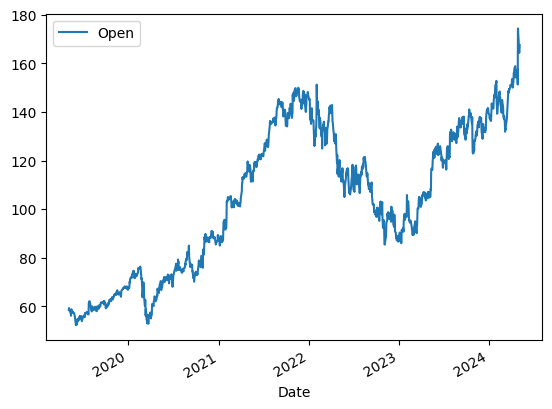

In [22]:
open.plot()

In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [26]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [28]:
len(ds_scaled), len(ds)

(1259, 1259)

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(ds_scaled, ds_scaled, test_size=0.3, random_state=42)

In [35]:
len(X_train), len(X_test)

(881, 378)